## Deutsch Algorithm


Wyobraźmy sobie, ze ktoś ukrywa dwie monety w kazdej ręce. 
Poniewaz kazda moneta ma dwie strony (niezalezne) dwie ręcę mogą ukryć 4 mozliwe sytuacje. 
Jeśli w obu rękach mamy te same strony mozemy powiedziec o `stałej funkcji`, która przyjmuje lewą rękę a zwraca prawą. Jeśli wynik ulega zmianie mozemy powiedziec o funkcji `zbalansowanej`.

W przypadku monet nawet jeśli odsłonimy monetę w lewej ręce nie jesteśmy w stanie stwierdzić bez sprawdzenia co jest w prawej ręce. A teraz wyobraź sobie 100 takich rąk. Aby mieć pewność czy masz doczynienia z funkcją stałą musisz (czy chcesz czy nie) sprawdzić wszystkie mozliwości - wystarczy jedna róznica, aby funkcja była zbalansowana. 

Co powiesz jeśli stwierdzę, ze kwantowy komputer moze rozwiązać problem otwierając wszystkie ręcę za jednym razem? 

Dla funkcji boolowskiej $f:\{0,1\} \rightarrow \{0, 1\}$ mowimy, ze $f$ jest zbalansowana jeśli $f(0) \neq f(1)$ lub stała jeśli $f(0) = f(1)$.

$$
f(0) = 0 = \begin{pmatrix} 1 \\ 0 \end{pmatrix}\\
f(1) = 0 = \begin{pmatrix} 1 \\ 0 \end{pmatrix}\\
$$
Taka funkcja moze być reprezentowana jako (odwracalna i unitarna) macierz: 
$$
f = \begin{pmatrix} 1 \,\, 1 \\0 \,\, 0 \end{pmatrix}
$$

Aby sprawdzić i jednoznacznie stwierdzić czy funkcja, którą się posługujemy jest stała czy zbalansowana w klasycznym przypadku musimy sprawdzić oba wyniki $f(0)$ i $f(1)$.

Bardzo często tego typu modelowanie (funkcję) nazywa się `black box` lub `oracle`. 







Given  $f:\{0,1\} \rightarrow \{0, 1\}$ as an oracle, that is we can evaluate it for an input by making queries but we can't look inside, the problem is to decide whether $f$ is constant or balanced.

<h3>Oracle model of computation </h3>

Suppose that your friend picks such a function $f$ and you try to guess whether it is constant or balanced. You are only allowed to ask questions like "What is $f(0)$?" Each question you ask, is a query to the function $f$. In quantum computing, many algorithms rely on this oracle model of computation and the aim is to solve some problem making as minimum queries as possible.


## Classical solution

Given such a function, we need to evaluate the function *twice* to get an answer using a classical computer. 

## Quantum solution

We had previously established that every 'classical' logical function $f$ can be converted to an equivalent unitary operator $U_f$ (by constructing a logical quantum circuit). Now we are going to propose a quantum algorithm that evaluates $U_f$ only *once*.

<h2> Algorithm </h2>

We construct a 2 qubit circuit.

- Set the second qubit to state $\ket{-}$ by applying $X$ and $H$ gates.

- Apply $H$ to first qubit.

- Apply $U_f$.

- Apply $H$ to first qubit.

- Measure the first qubit. If it is 0 then $f$ is constant. If it is 1, then $f$ is balanced.

Tworzymy dwa rejestry kwantowe - input $\ket{x}$ i output $\ket{y}$

Definiujemy rejestr outputu jako wynik działania XOR na rejestrze inputu: 
$$
U_f: \ket{x} ,\ket{y} \to \ket{x}, \ket{y \oplus f(x)}\\
U^{-1}_f: \ket{x}, \ket{y \oplus f(x)} \to \ket{x} ,\ket{y}

$$

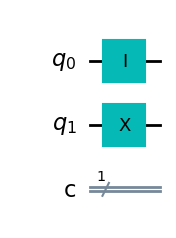

In [3]:
# krok 1 2 kubitowy circuit
qc = QuantumCircuit(2,1)
qc.i(0)
qc.x(1)
qc.draw(output='mpl')

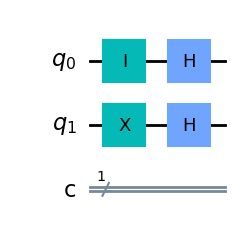

In [4]:
# krok 2 hadamard na oba kubity - tworzymy superpozycje aby działać na 4 stanach jednocześnie

qc.h(0)
qc.h(1)
qc.draw(output='mpl')

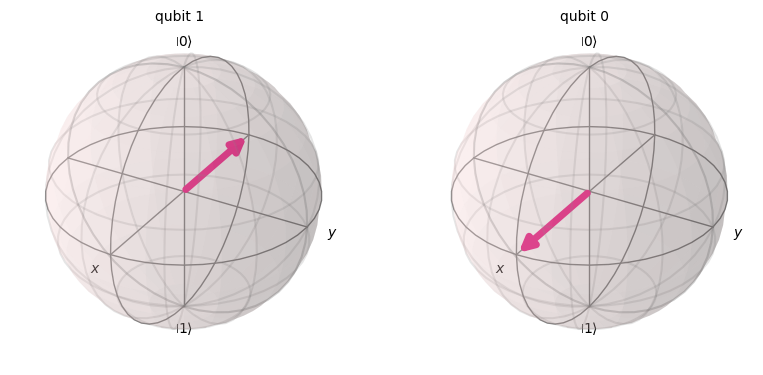

In [5]:
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_bloch_multivector
state = Statevector(qc)
display(plot_bloch_multivector(state, reverse_bits=True))

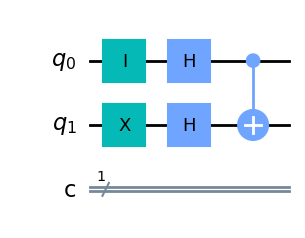

In [6]:
qc.cx(0,1)
qc.draw(output='mpl')

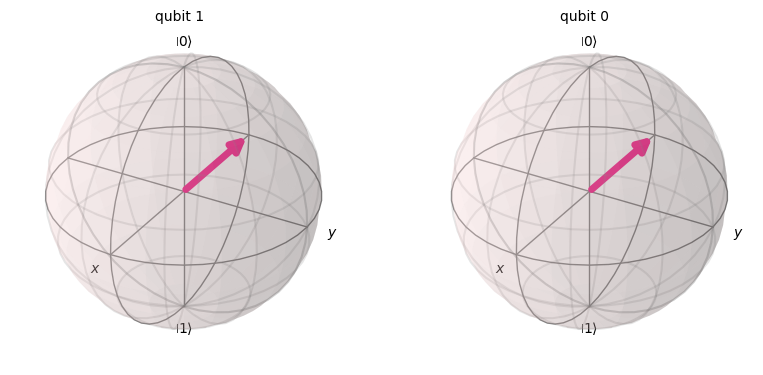

In [7]:
state = Statevector(qc)
display(plot_bloch_multivector(state, reverse_bits=True))

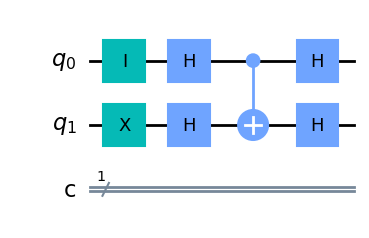

In [8]:
qc.h(0)
qc.h(1)
qc.draw(output='mpl')

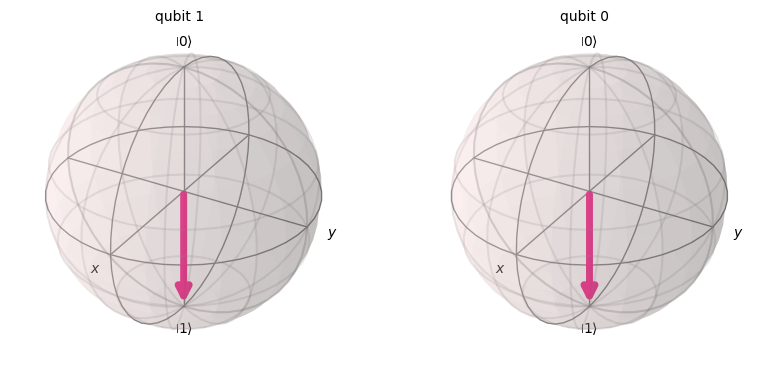

In [9]:
state = Statevector(qc)
display(plot_bloch_multivector(state, reverse_bits=True))

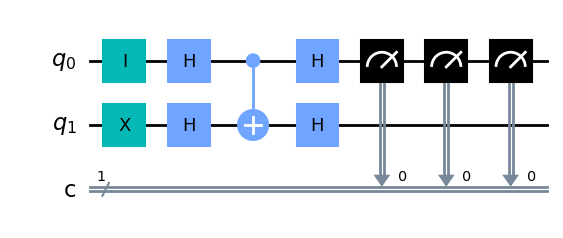

In [12]:
from qiskit import execute, Aer

qc.measure(0,0)
display(qc.draw(output='mpl'))

backend = Aer.get_backend('qasm_simulator')
result = execute(qc, backend, shots=1000).result()
counts = result.get_counts(qc)

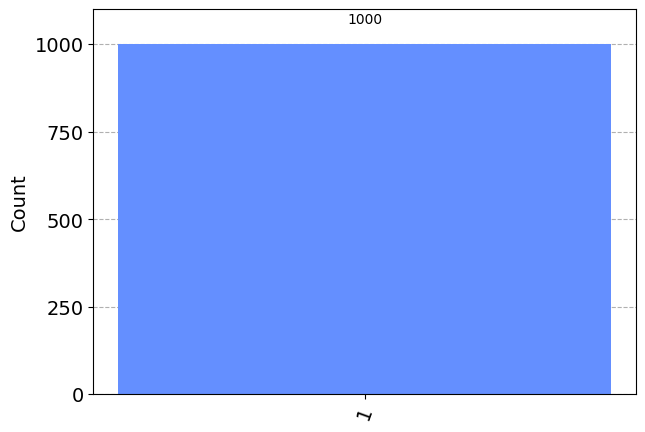

In [17]:
from qiskit.visualization import plot_histogram
plot_histogram(counts)

## Szyfrowanie 

## Kwantowa teleportacja 

## Groover

## Shor
